### ML-A2 Predict Heart Attack using Logistic Regression

Instructions
- Prepare a report to present your findings 
- Write a python code to implement logistic regression from scratch for the given heart attack analysis and prediction dataset.
- Implement the logistic regression using scikit-learn in the given dataset. 

Dataset: Heart Attack Analysis & Prediction Dataset [kaggle.com](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)


Instructions:
Submission should include python notebook file for all the implementations.

#### Load the module and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data

import pandas as pd

df_heart_attack = pd.read_csv('/home/suman/Applied-Machine-Learning/Logistic Regression/heart.csv')
df_heart_attack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# basic shape and size of the the data
print("The shape of the dataset is : ", df_heart_attack.shape)
print(f'The train dataset contains {df_heart_attack.shape[0]} rows and {df_heart_attack.shape[1]} columns.')

The shape of the dataset is :  (303, 14)
The train dataset contains 303 rows and 14 columns.


### Basic Data Exploration and Understanding

**Attributes of the Dataset**

| Column    | Description                                                                                      |
|-----------|--------------------------------------------------------------------------------------------------|
| age       | Age of the patient                                                                               |
| sex       | Sex of the patient                                                                               |
| exang     | Exercise induced angina (1 = yes; 0 = no)                                                        |
| caa       | Number of major vessels (0-3)                                                                    |
| cp        | Chest pain type                                                                                  |
|           | Value 1: Typical angina                                                                          |
|           | Value 2: Atypical angina                                                                         |
|           | Value 3: Non-anginal pain                                                                        |
|           | Value 4: Asymptomatic                                                                            |
| trtbps    | Resting blood pressure (in mm Hg)                                                                |
| chol      | Cholesterol in mg/dl fetched via BMI sensor                                                      |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                            |
| rest_ecg  | Resting electrocardiographic results                                                             |
|           | Value 0: Normal                                                                                  |
|           | Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV) |
|           | Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria            |
| thalach   | Maximum heart rate achieved                                                                      |
| slp       | Slope of the peak exercise ST segment                                                            |
| thall     | Thalassemia rate                                                                                 |
| output    | 0 = Less chance of heart attack; 1 = More chance of heart attack                                  |



In [4]:
# info of the dateset
df_heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- since we are solving logistic regression problem, the target or dependent variable must be discrete and here we can see that it is discrete which is `output`
- the categorical features are: `['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']`
- the continuous cols are :  `['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']`
- the target variable is :   `['output']`

### Basic EDA and Visualization

In [5]:
categorical_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_variable = ["output"]
print("The categorial cols are : ", categorical_features)
print("The continuous cols are : ", continous_features)
print("The target variable is :  ", target_variable)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [6]:
df_heart_attack[continous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# checkout missing values
df_heart_attack.isnull().sum()

# since there are no null values, we don't have to worry about the missing data.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [17]:
binary_vars = [col for col in df_heart_attack.columns if df_heart_attack[col].nunique() == 2]

The features `trtbps`, `oldpeak` and `chol` have distributions that are skewed, which means their data isn't symmetrically spread out. Instead, there's a bit of a lean to one side.

Outliers are values that are way off from the rest of the data points, like if most people's cholesterol levels are around 200, but then you have a few people with levels up near 400. These outliers can really affect our analysis and any models we build because they're so different from the typical values.

This skewness and the presence of outliers can affect how we analyze the data and how our models perform, so it's something to keep an eye on.

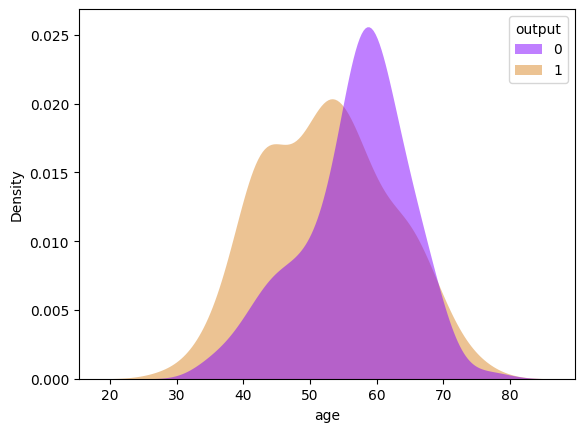

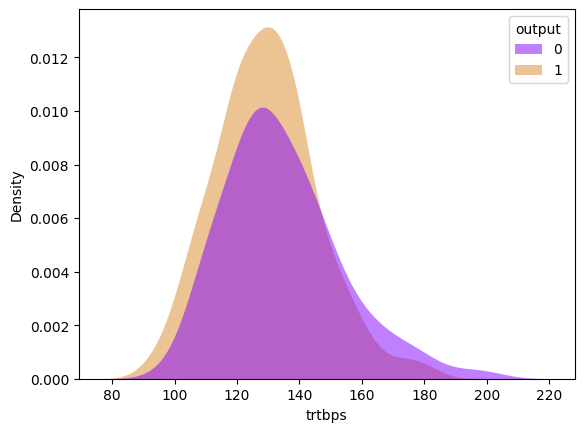

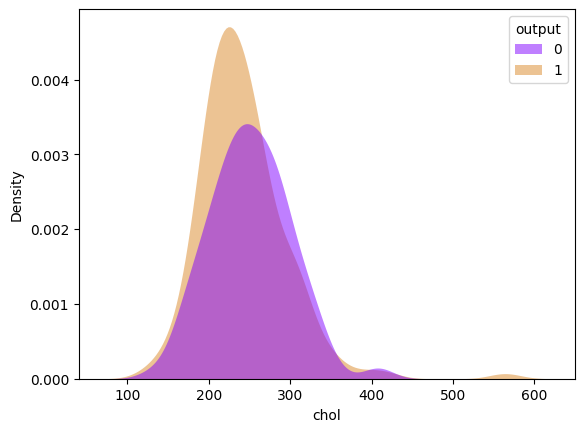

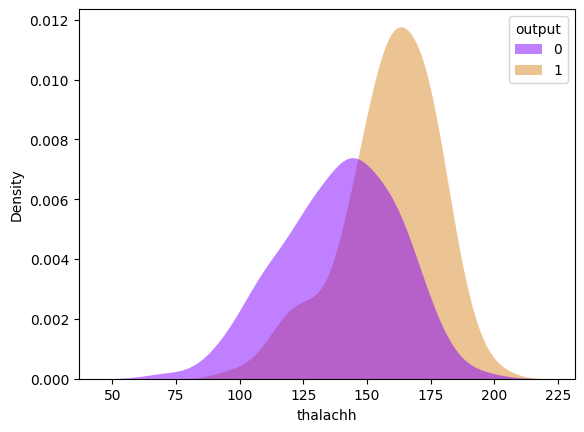

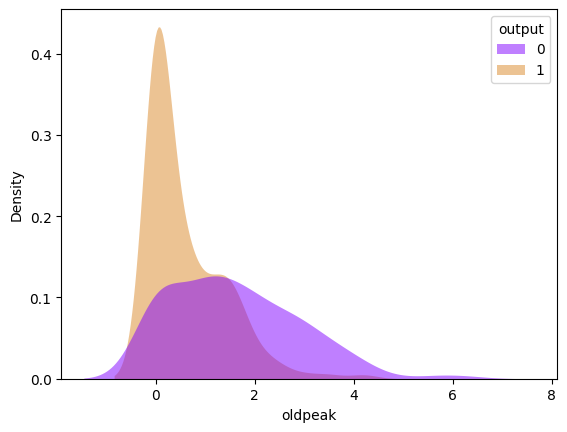

In [50]:
# distribution of continous variable vs target
for features in continous_features:
    sns.kdeplot(data=df_heart_attack, x=features, hue='output', fill=True, palette=["#8000ff", "#da8829"], alpha=0.5, linewidth=0)
    plt.show()

- It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of `age` wrt `output`, it is evident that this isn't the case.
- According to the distribution plot of `thalachh` wrt `output`, people with higher maximum heart rate achieved have higher chances of heart attack.
- According to the distribution plot of `oldpeak` wrt `output`, people with lower pevious peak achieved have higher chances of heart attack.

#### Co-relation among the features

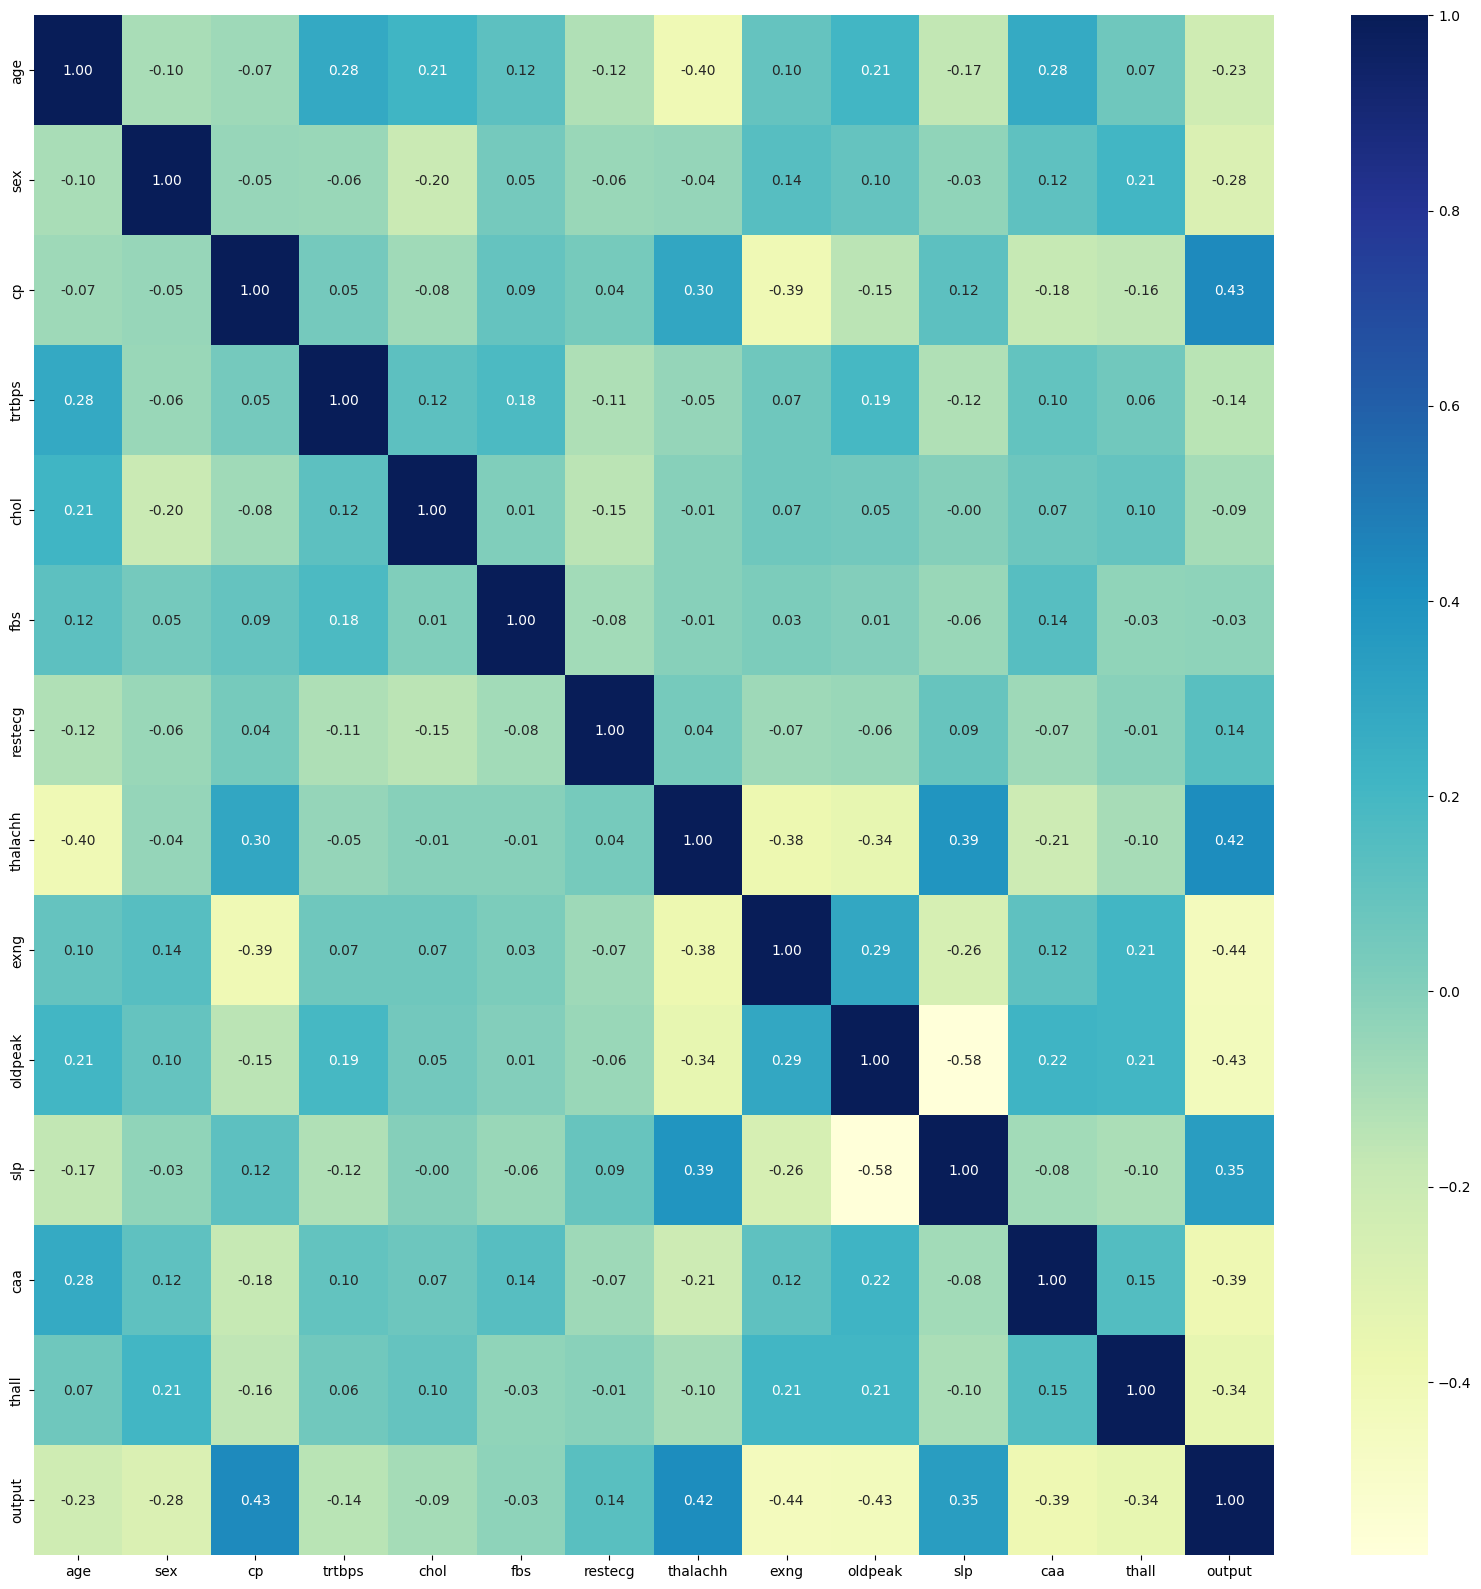

In [52]:
#large the map
plt.figure(figsize=(20, 20))  # Adjust the numbers as needed

# Create the heatmap
sns.heatmap(df_heart_attack.corr(), cmap='YlGnBu', annot=True,fmt='.2f')
plt.show()

summary of the useful correlations:

1. **Age:**
   - **thalachh**: Correlation of -0.40 (Moderate negative correlation)
     - Older patients tend to have a lower maximum heart rate achieved.

2. **Sex:**
   - **output**: Correlation of -0.281 (Weak negative correlation)
     - Indicates that males (coded as 1) are slightly less likely to have a higher chance of heart attack.

3. **cp (Chest Pain Type):**
   - **output**: Correlation of 0.434 (Moderate positive correlation)
     - Patients with certain chest pain types have a higher chance of heart attack.

4. **thalachh (Maximum Heart Rate Achieved):**
   - **output**: Correlation of 0.422 (Moderate positive correlation)
     - A higher maximum heart rate is associated with a higher chance of heart attack.
   - **exng**: Correlation of -0.379 (Moderate negative correlation)
     - Exercise-induced angina is less likely in those with a higher maximum heart rate.

5. **exng (Exercise Induced Angina):**
   - **output**: Correlation of -0.437 (Moderate negative correlation)
     - If exercise induces angina, the chance of heart attack is higher.

6. **oldpeak (ST depression induced by exercise):**
   - **output**: Correlation of -0.431 (Moderate negative correlation)
     - Higher ST depression is associated with a higher chance of heart attack.

7. **slp (Slope of the Peak Exercise ST Segment):**
   - **output**: Correlation of 0.346 (Moderate positive correlation)
     - A better (upsloping) ST segment during peak exercise is associated with a lower chance of heart attack.

8. **caa (Number of Major Vessels):**
   - **output**: Correlation of -0.392 (Moderate negative correlation)
     - The more major vessels that are blocked, the higher the chance of heart attack.

- **Chest pain type (cp)**, **thalachh (max heart rate)**, **exng (exercise-induced angina)**, **oldpeak (ST depression)**, **slp (slope of peak exercise ST segment)**, and **caa (number of major vessels)** show meaningful correlations with the **output** (chance of heart attack).
- **Age** and **thalachh** also show a strong negative correlation, indicating that older patients tend to have lower maximum heart rates. 

These correlations suggest important relationships between certain features and the likelihood of a heart attack, which can be useful for predictive modeling.